In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

import measurement
import echo
import distance
import image

In [43]:
# choose dataset
fname = 'datasets/set_3.mat'
dataset = sio.loadmat(fname)

In [44]:
fs = float(dataset['fs'])
M = int(dataset['M'])
N = int(dataset['N'])
h = float(dataset['h'])
l = float(dataset['l'])
w = float(dataset['w'])
r = dataset['receivers']
s = dataset['sources']
data = dataset['data'].T
c = float(dataset['c'])

maxsize = np.sqrt(w**2+l**2+h**2) #m
max_delay = maxsize / float(c) 
maxlength = int(2 * max_delay * fs)

measurements  = [measurement.MeasurementData(data=np.hstack(source_data).T, 
                                 receivers=r, 
                                 sources=s[i], 
                                 room_dimensions=(w,l,h), 
                                 c=c, 
                                 fs=fs) 
                 for i,source_data in enumerate(data)]

In [45]:
echo_data = [echo.EchoData(m.find_echoes(crop=maxlength, interpolate=10)) for m in measurements]

In [47]:
D = measurement.squared_distance_matrix(r, augmented=True)
S, E = zip(*[e.find_labels(D,threshold=0.0005, parallel=True, verbose=True) for e in echo_data[:6]])
E = [e for e in E if len(e) > 0]
S = np.vstack(S)

Finding echo_set candidates per measurement ...
prefilter threshold: 0.0005
Number of unique sets of 6 echo_sets: 1
Finding echo_set candidates per measurement ...
prefilter threshold: 0.0005
prefilter threshold: 0.001
prefilter threshold: 0.002
prefilter threshold: 0.004
Number of unique sets of 6 echo_sets: 0
Finding echo_set candidates per measurement ...
prefilter threshold: 0.0005
Number of unique sets of 6 echo_sets: 1
Finding echo_set candidates per measurement ...
prefilter threshold: 0.0005
Number of unique sets of 6 echo_sets: 1
Finding echo_set candidates per measurement ...
prefilter threshold: 0.0005
Number of unique sets of 6 echo_sets: 1
Finding echo_set candidates per measurement ...
prefilter threshold: 0.0005
prefilter threshold: 0.001
Number of unique sets of 6 echo_sets: 1


In [48]:
distancedata = distance.DistanceData(S,E)
results = distancedata.find_images(r)

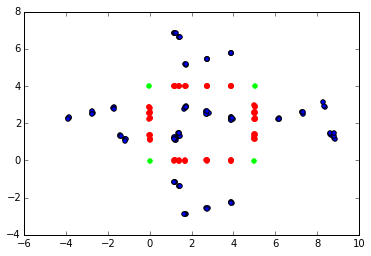

In [49]:
if len(results) > 0:
    imagedata = image.ImageSourceData(results, 6, r, (w,l,h))
    wall_points,vertices = imagedata.find_walls(threshold=0.05, bestN=10)
    im = np.vstack(imagedata.images)
    plt.scatter(im[:,0], im[:,1])
    wp = np.vstack(wall_points)
    plt.scatter(wp[:,0], wp[:,1], color=(1,0,0,1))
    plt.scatter(vertices[:,0], vertices[:,1], color=(0,1,0,1))